<a href="https://colab.research.google.com/github/SheidaAbedpour/MNIST-Neural-Networks/blob/main/MNIST_MLP_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

import tensorboard
from torch.utils.tensorboard import SummaryWriter

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [44]:
# HyperParameters
batch_size = 128
learning_rate = 0.001
num_epochs = 10

# Load Dataset MNIST:

In [45]:
# MNIS Dataset
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True)

In [46]:
# Load Data
train_data = DataLoader(dataset=train_dataset,
                        batch_size=batch_size,
                        shuffle=True)

test_data = DataLoader(dataset=test_dataset,
                       batch_size=batch_size,
                       shuffle=False)

In [47]:
# iterate trought the dataloader
for images, lables in train_data:
  print(f'images "{type(images)}" shape: {images.shape}\t,lables "{type(lables)}" shape: {lables.shape}')
  break


'''
images: [128, 1, 28, 28]:
Batch size: 128 images
Channels: 1 (grayscale)
Height: 28 pixels
Width: 28 pixels
'''

images "<class 'torch.Tensor'>" shape: torch.Size([128, 1, 28, 28])	,lables "<class 'torch.Tensor'>" shape: torch.Size([128])


'\nimages: [128, 1, 28, 28]:\nBatch size: 128 images\nChannels: 1 (grayscale)\nHeight: 28 pixels\nWidth: 28 pixels\n'

# Define MLP Architecture

In [48]:
hidden_sizes = [128, 64, 32]

in_features = 28 * 28
out_features = 10

model = nn.Sequential(
    nn.Flatten(),  # images.reshape(-1, 28*28)
    nn.Linear(in_features=in_features, out_features=hidden_sizes[0]),
    nn.ReLU(),
    nn.Linear(in_features=hidden_sizes[0], out_features=hidden_sizes[1]),
    nn.Sigmoid(),
    nn.Linear(in_features=hidden_sizes[1], out_features=hidden_sizes[2]),
    nn.Sigmoid(),
    nn.Linear(in_features=hidden_sizes[2], out_features=out_features)
    # dont apply softmax becuase we'll use crrosEntropyLoss(it applies itself)
)

# Train MLP

In [49]:
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [50]:
num_batches = len(train_data)  # train_samples/batch_size


for epoch in range(num_epochs):
  for i, (images, lables) in enumerate(train_data):
    images, lables = images.to(device), lables.to(device)

    # forward
    outputs = model(images)

    # compute loss
    loss = criterion(outputs, lables)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if (i + 1) % 100 == 0:
      print(f'epoch{epoch+1}/{num_epochs}, batch{i+1}/{num_batches}, loss:{loss.item():.4f}')

print("training finished")

epoch1/10, batch100/469, loss:1.7193
epoch1/10, batch200/469, loss:1.2823
epoch1/10, batch300/469, loss:0.7589
epoch1/10, batch400/469, loss:0.5982
epoch2/10, batch100/469, loss:0.4010
epoch2/10, batch200/469, loss:0.3384
epoch2/10, batch300/469, loss:0.3065
epoch2/10, batch400/469, loss:0.2932
epoch3/10, batch100/469, loss:0.2568
epoch3/10, batch200/469, loss:0.2519
epoch3/10, batch300/469, loss:0.2007
epoch3/10, batch400/469, loss:0.1281
epoch4/10, batch100/469, loss:0.1647
epoch4/10, batch200/469, loss:0.1139
epoch4/10, batch300/469, loss:0.0880
epoch4/10, batch400/469, loss:0.1638
epoch5/10, batch100/469, loss:0.1264
epoch5/10, batch200/469, loss:0.0686
epoch5/10, batch300/469, loss:0.1090
epoch5/10, batch400/469, loss:0.2387
epoch6/10, batch100/469, loss:0.0276
epoch6/10, batch200/469, loss:0.0859
epoch6/10, batch300/469, loss:0.0652
epoch6/10, batch400/469, loss:0.0623
epoch7/10, batch100/469, loss:0.0596
epoch7/10, batch200/469, loss:0.0659
epoch7/10, batch300/469, loss:0.0177
e

In [51]:
# Test and Evaluate Model

model.eval()

true_labels = []
predicted_labels = []
total = 0
correct = 0

# Disable gradient calculation for evaluation
with torch.no_grad():
    for images, lables in test_data:
        images, lables = images.to(device), lables.to(device)

        # Forward pass
        outputs = model(images)

        # Get the predicted class
        _, predicted = torch.max(outputs, dim=1)

        total += lables.shape[0]
        correct += (predicted == lables).sum().item()

        true_labels.extend(lables.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

print(f'Accuracy of the model on the test images: {100 * correct / total} %')

Accuracy of the model on the test images: 97.46 %


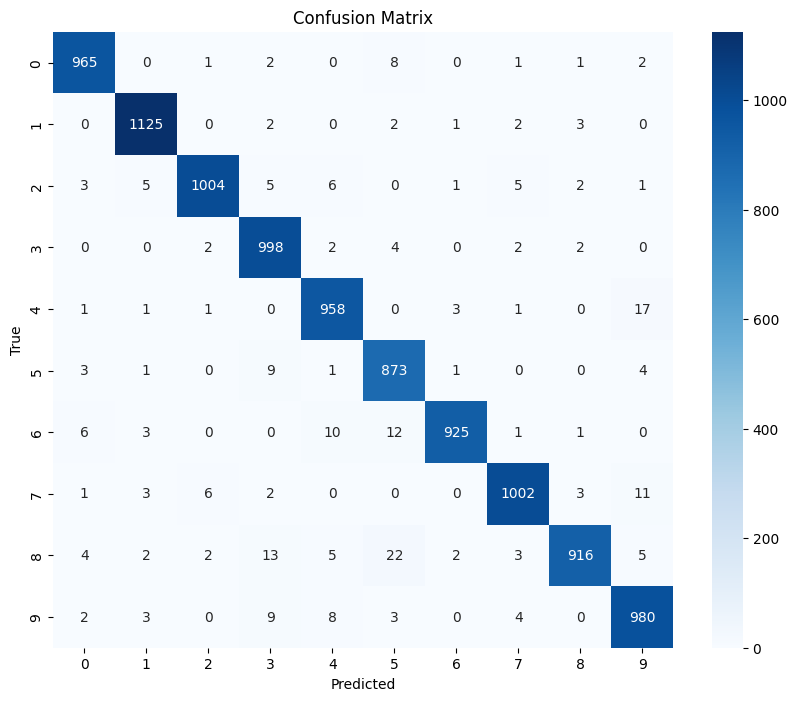

In [52]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()